In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [50]:
df = pd.read_csv('/Users/mille/Desktop/Honey Production/honeyproduction.csv')


In [51]:
df.head()


,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000,1594000.0,0.70,1361000.0,1998


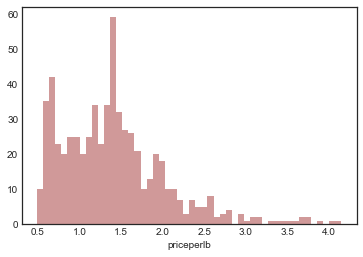

In [14]:
import seaborn as sns

sns.distplot(df['priceperlb'].dropna(),kde=False,color='darkred',bins=50)

In [52]:
df.describe()


,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

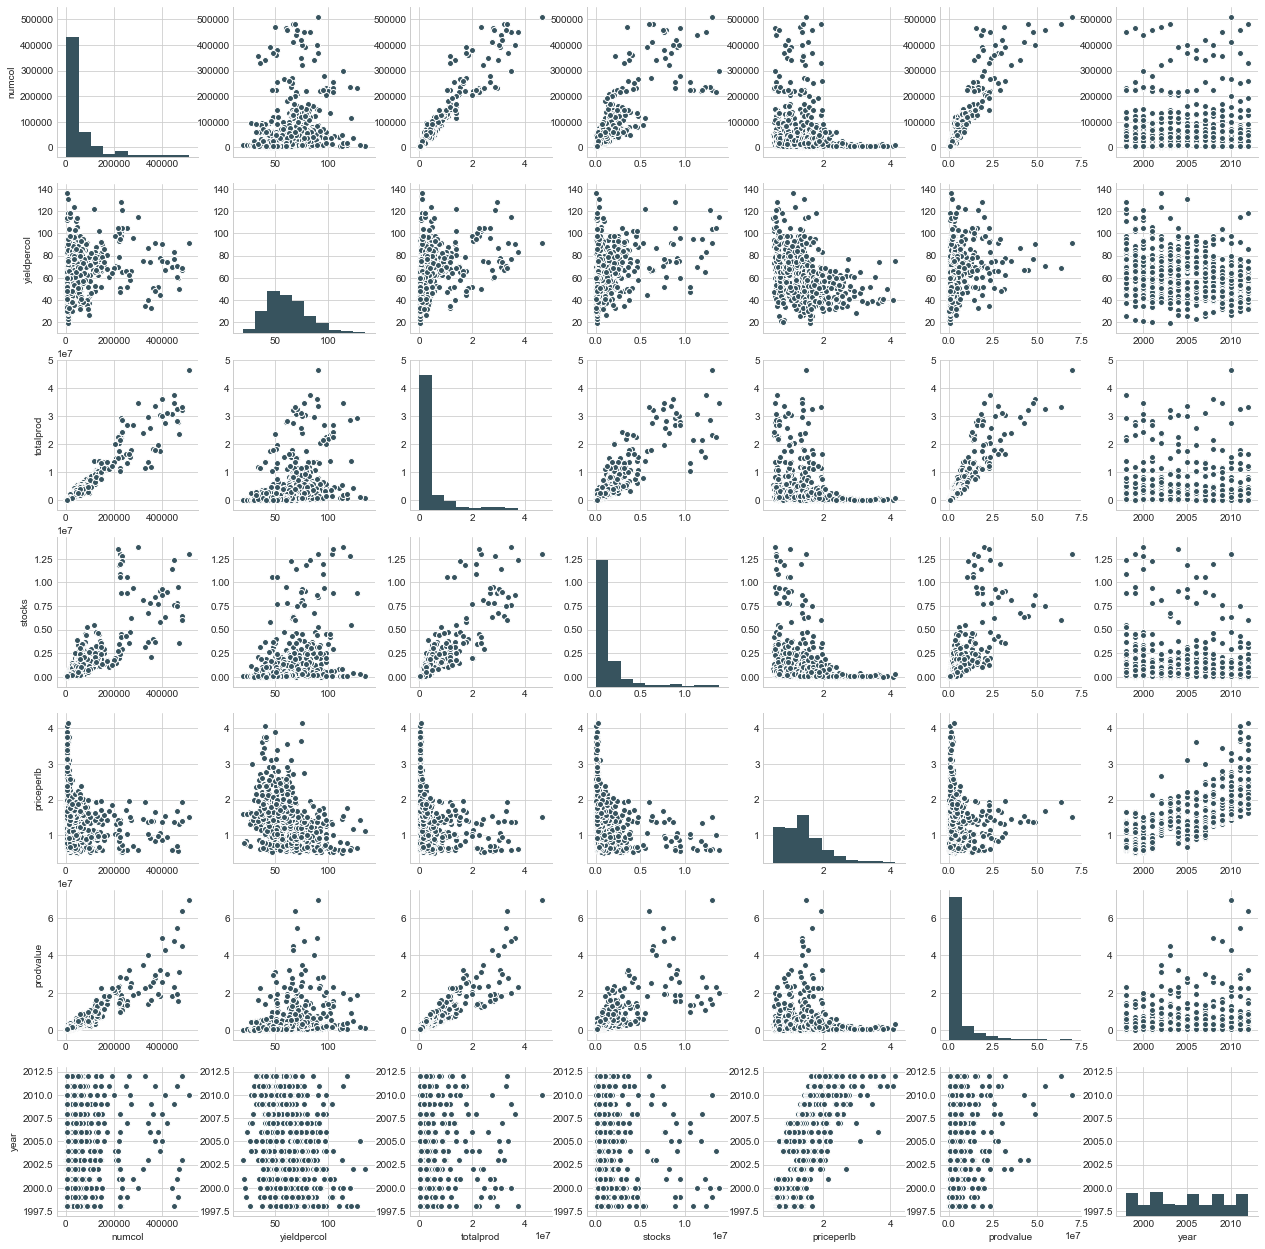

In [18]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.pairplot(df)

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from gensim import corpora, models

from collections import Counter



C:\Users\mille\Conda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


C:\Users\mille\Conda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


'The Yield production of honey per state is not would was predicted.'

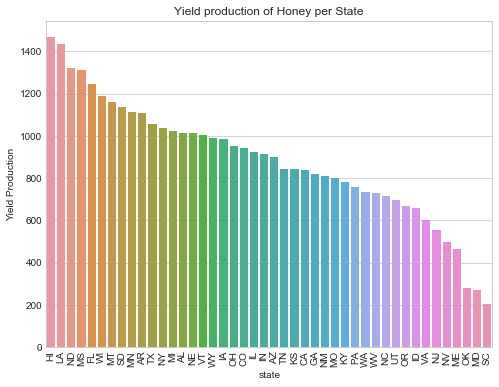

In [20]:
state_yield = df[['state','yieldpercol']].groupby(['state']).sum()
state_yield = state_yield['yieldpercol'].sort_values(ascending=False)[:50]
state_yield_keys = state_yield.index
state_yield_val = state_yield.values
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = state_yield_keys,y =state_yield_val)
plt.title('Yield production of Honey per State')
plt.ylabel('Yield Production')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

"""The Yield production of honey per state is not would was predicted."""

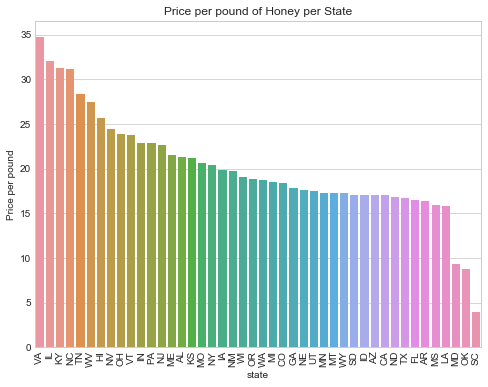

In [21]:
state_yield = df[['state','priceperlb']].groupby(['state']).sum()
state_yield = state_yield['priceperlb'].sort_values(ascending=False)[:50]
state_yield_keys = state_yield.index
state_yield_val = state_yield.values
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = state_yield_keys,y =state_yield_val)
plt.title('Price per pound of Honey per State')
plt.ylabel('Price per pound')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)


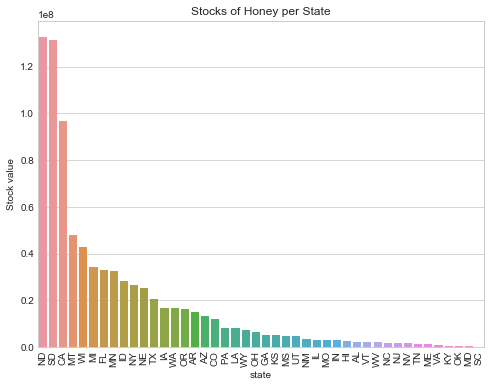

In [22]:
state_yield = df[['state','stocks']].groupby(['state']).sum()
state_yield = state_yield['stocks'].sort_values(ascending=False)[:50]
state_yield_keys = state_yield.index
state_yield_val = state_yield.values
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = state_yield_keys,y =state_yield_val)
plt.title('Stocks of Honey per State')
plt.ylabel('Stock value')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)


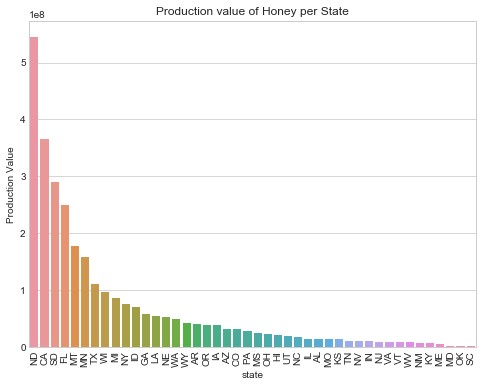

In [23]:
state_yield = df[['state','prodvalue']].groupby(['state']).sum()
state_yield = state_yield['prodvalue'].sort_values(ascending=False)[:50]
state_yield_keys = state_yield.index
state_yield_val = state_yield.values
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = state_yield_keys,y =state_yield_val)
plt.title('Production value of Honey per State')
plt.ylabel('Production Value')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

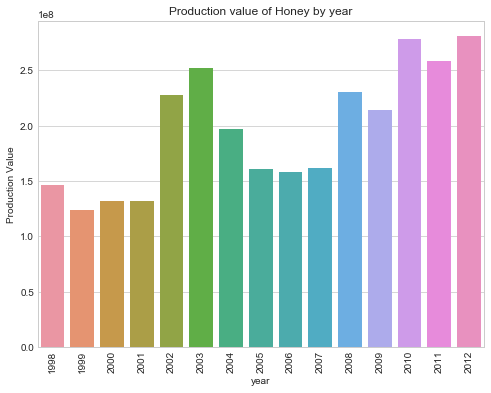

In [24]:
state_yield = df[['year','prodvalue']].groupby(['year']).sum()
state_yield = state_yield['prodvalue'].sort_values(ascending=False)[:30]
state_yield_keys = state_yield.index
state_yield_val = state_yield.values
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = state_yield_keys,y =state_yield_val)
plt.title('Production value of Honey by year')
plt.ylabel('Production Value')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

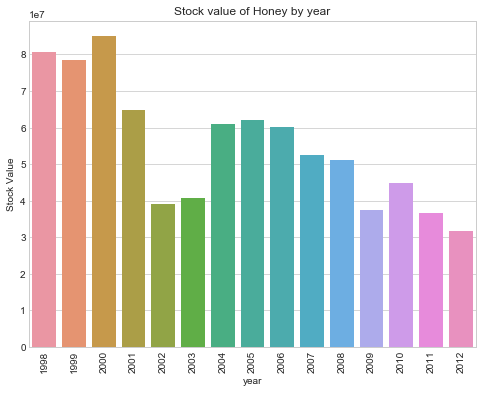

In [25]:
state_yield = df[['year','stocks']].groupby(['year']).sum()
state_yield = state_yield['stocks'].sort_values(ascending=False)[:30]
state_yield_keys = state_yield.index
state_yield_val = state_yield.values
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = state_yield_keys,y =state_yield_val)
plt.title('Stock value of Honey by year')
plt.ylabel('Stock Value')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

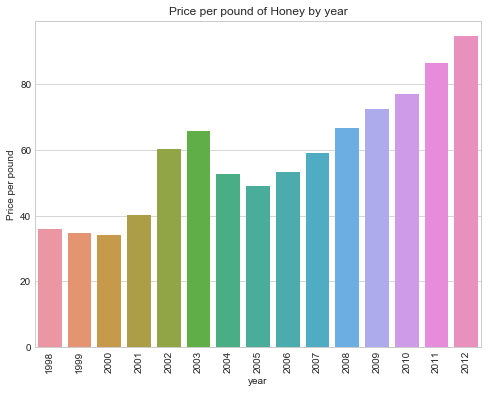

In [26]:

state_yield = df[['year','priceperlb']].groupby(['year']).sum()
state_yield = state_yield['priceperlb'].sort_values(ascending=False)[:30]
state_yield_keys = state_yield.index
state_yield_val = state_yield.values
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = state_yield_keys,y =state_yield_val)
plt.title('Price per pound of Honey by year')
plt.ylabel('Price per pound')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [27]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


In [28]:
df.groupby(['state']).mean()


,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
state,,,,,,,
AL,11933.333333,67.533333,8.254667e+05,1.588000e+05,1.418667,1.001933e+06,2005.0
AR,36800.000000,73.933333,2.810400e+06,9.926667e+05,1.092000,2.684400e+06,2005.0
AZ,33666.666667,60.066667,2.032267e+06,8.770000e+05,1.134667,2.111800e+06,2005.0
CA,406666.666667,55.800000,2.316900e+07,6.453800e+06,1.133333,2.435933e+07,2005.0
CO,28000.000000,62.800000,1.750600e+06,8.152667e+05,1.229333,2.090267e+06,2005.0
FL,195200.000000,83.066667,1.646987e+07,2.209600e+06,1.100667,1.661527e+07,2005.0
GA,60400.000000,54.666667,3.299933e+06,3.522667e+05,1.185333,3.867533e+06,2005.0
HI,8733.333333,98.000000,8.431333e+05,1.702000e+05,1.710000,1.404200e+06,2005.0
IA,31466.666667,65.733333,2.080000e+06,1.129933e+06,1.320667,2.588333e+06,2005.0


C:\Users\mille\Conda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


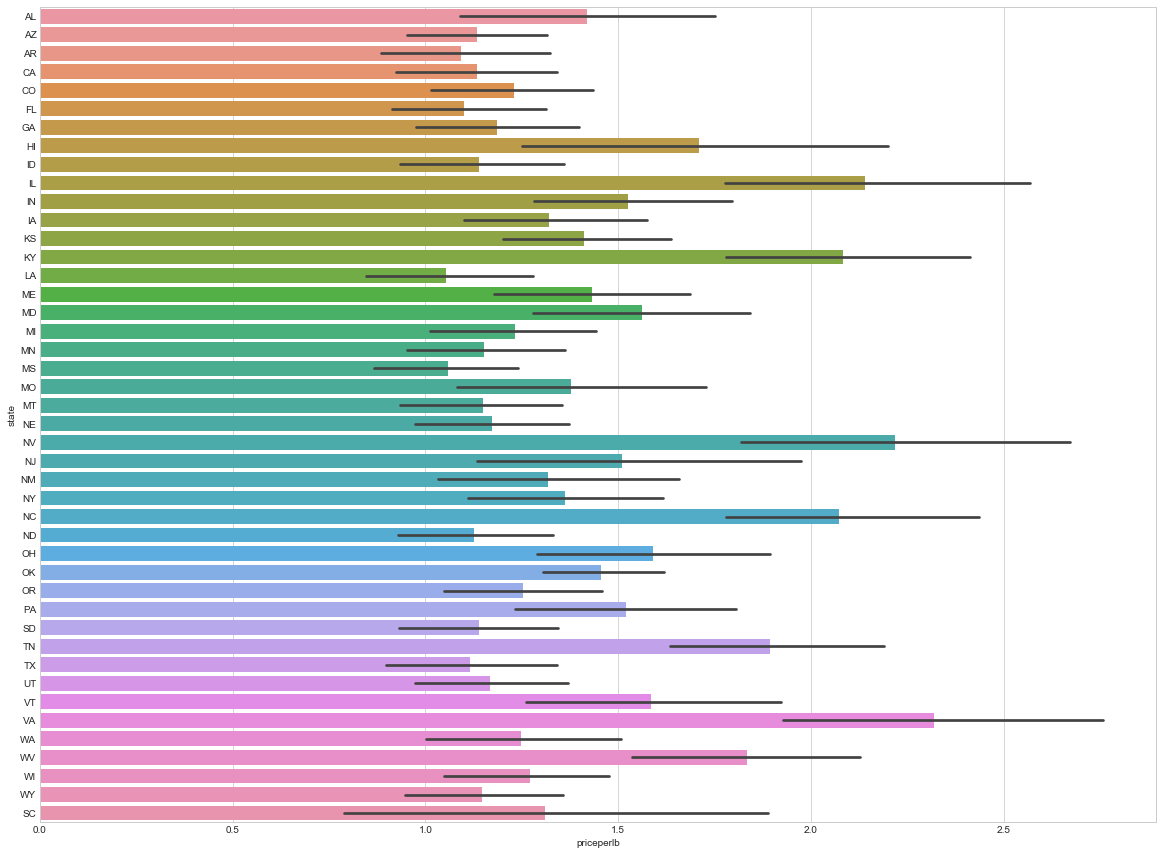

In [29]:
plt.subplots(figsize=(20,15))

sns.barplot(x='priceperlb',y='state',data=df)


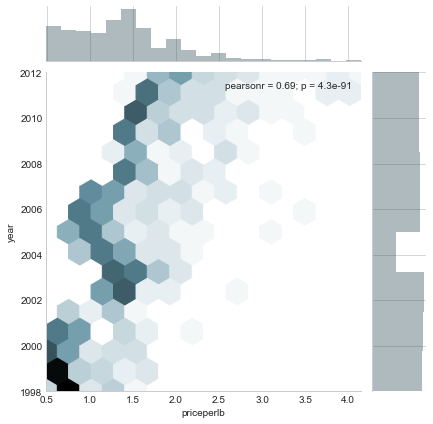

In [30]:

sns.jointplot(x='priceperlb',y='year',data=df,kind='hex')


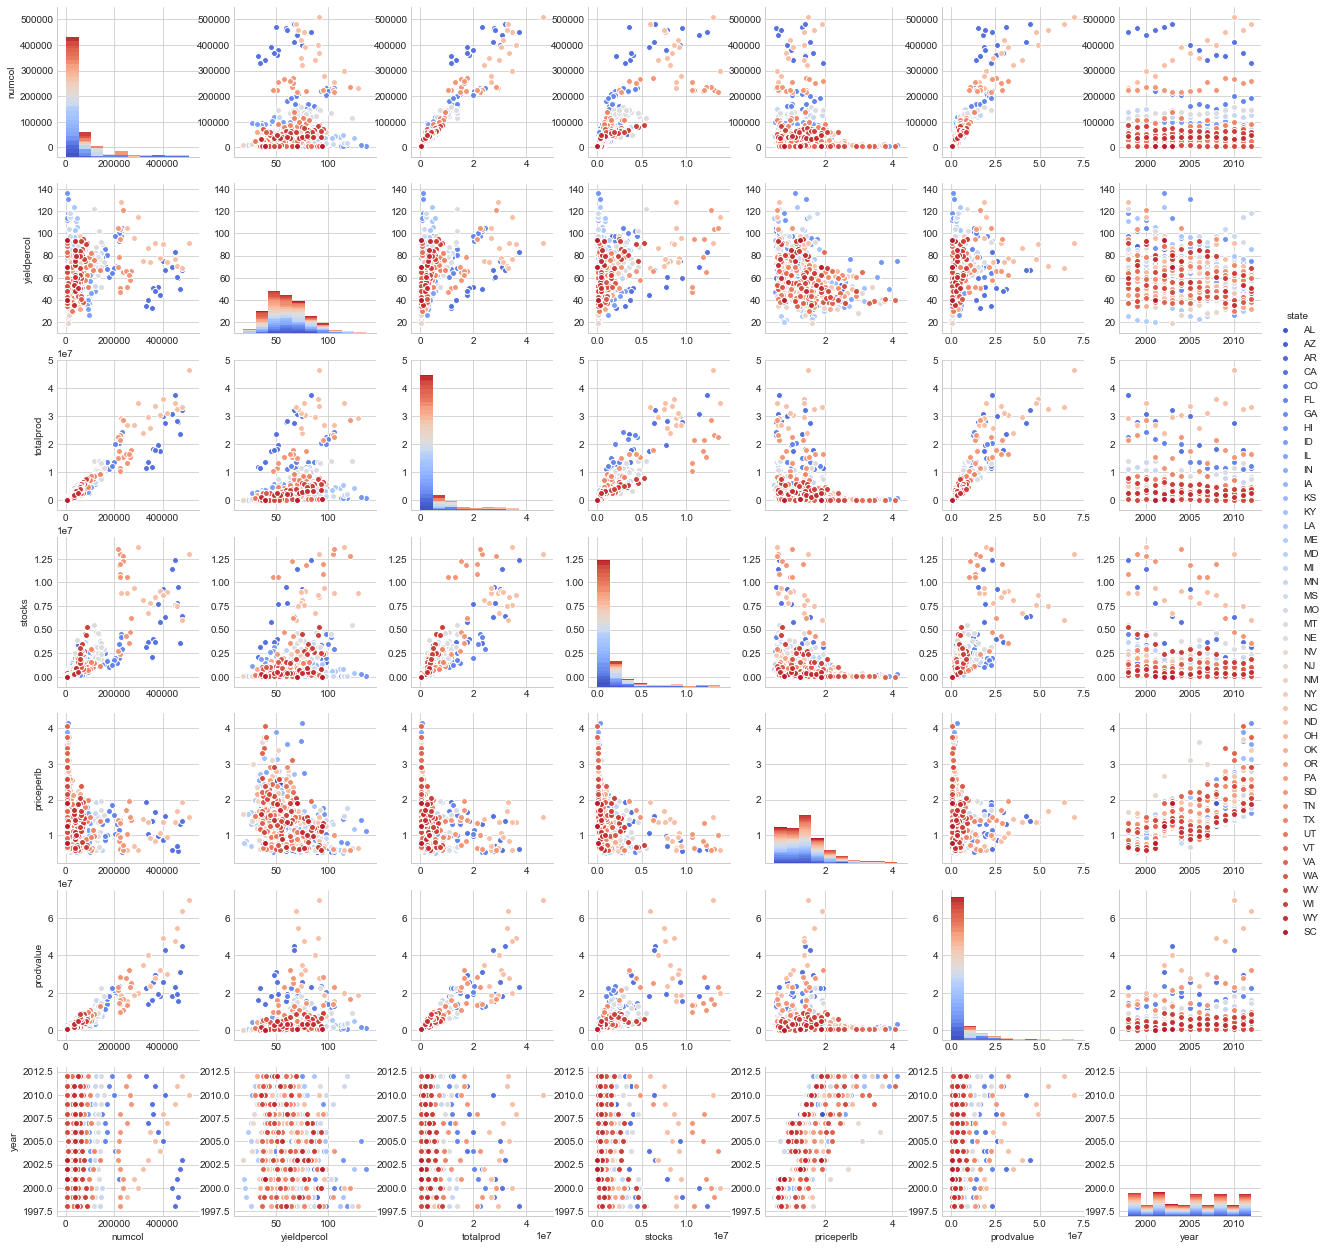

In [31]:
sns.pairplot(df,hue='state',palette='coolwarm')


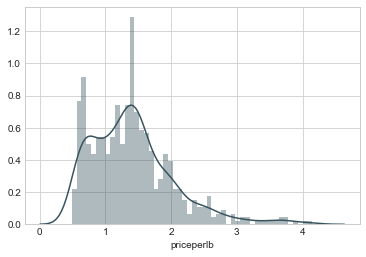

In [32]:
sns.distplot((df.priceperlb),bins=50)


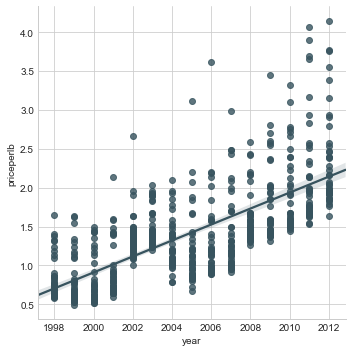

In [23]:
sns.lmplot(x='year',y='priceperlb',data=df)

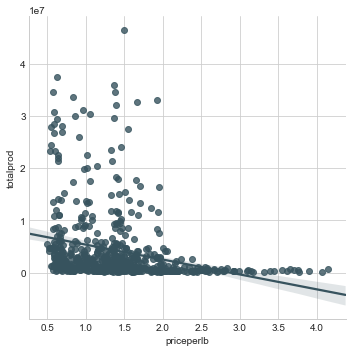

In [25]:
sns.lmplot(x='priceperlb',y='totalprod',data=df)

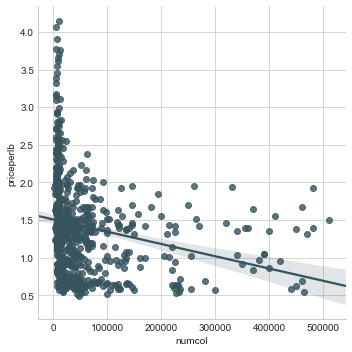

In [53]:
sns.lmplot(x='numcol',y='priceperlb',data=df) 

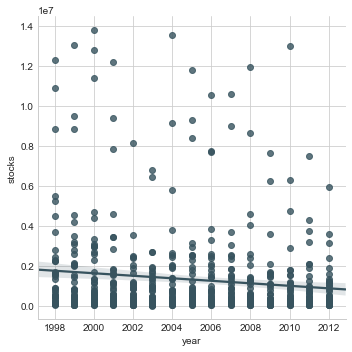

In [27]:
sns.lmplot(x='year',y='stocks',data=df)

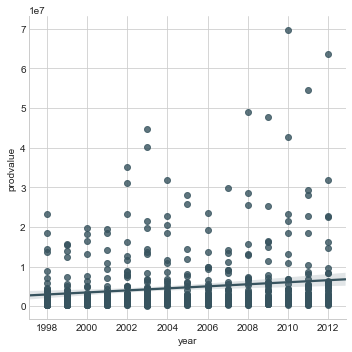

In [28]:
sns.lmplot(x='year',y='prodvalue',data=df)

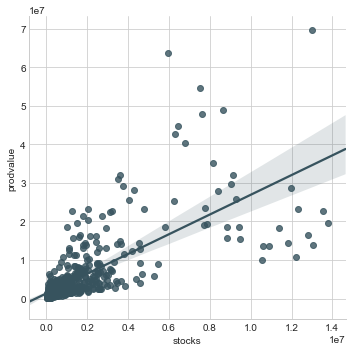

In [29]:
sns.lmplot(x='stocks',y='prodvalue',data=df)

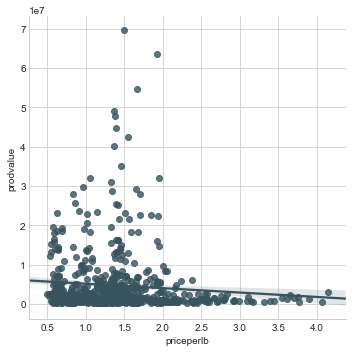

In [30]:
sns.lmplot(x='priceperlb',y='prodvalue',data=df)

In [31]:
df.corr()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701,0.912796,0.008709
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646,0.278977,-0.232092
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499,0.907236,-0.055556
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867,0.728560,-0.119602
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000,-0.089567,0.693984
prodvalue,0.912796,0.278977,0.907236,0.728560,-0.089567,1.000000,0.139451
year,0.008709,-0.232092,-0.055556,-0.119602,0.693984,0.139451,1.000000


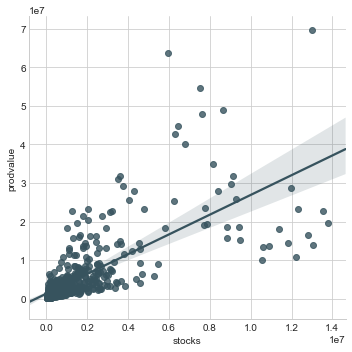

In [33]:
sns.lmplot(x='stocks',y='prodvalue',data=df)

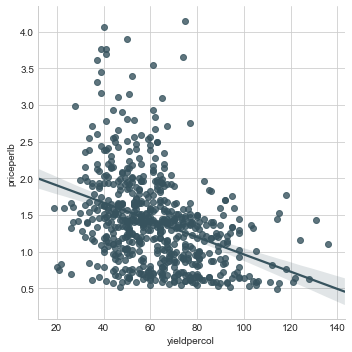

In [34]:
sns.lmplot(x='yieldpercol',y='priceperlb',data=df)

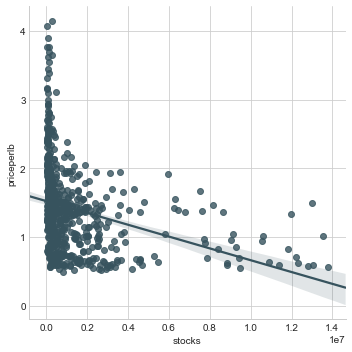

In [35]:
sns.lmplot(x='stocks',y='priceperlb',data=df)

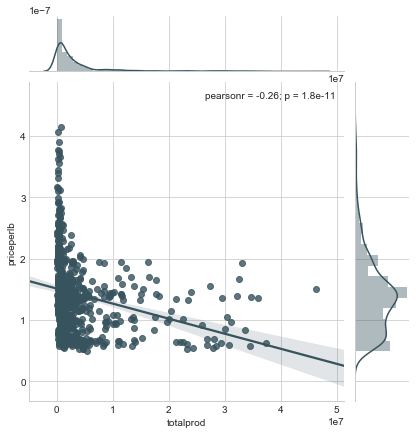

In [46]:
sns.jointplot(x='totalprod',y='priceperlb',data=df,kind='reg')


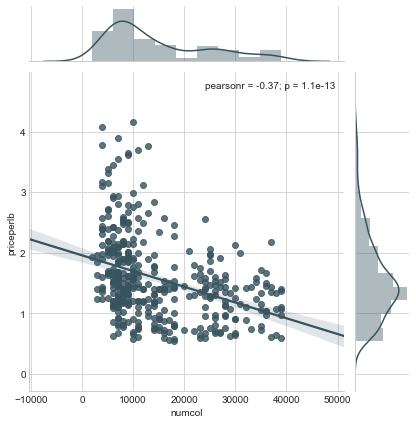

In [63]:
#talp = df[df['Total_Annual_Loss_percentage'] > 65]
#talp

decline = df[df['numcol'] < 40000]
decline

#sns.set_style('whitegrid')
#sns.lmplot('Total_Annual_Loss_percentage','Colonies',talp, hue='State',
           #palette='coolwarm',size=6,aspect=1,fit_reg=False)

#sns.lmplot(x='totalprod',y='priceperlb',data=decline)

sns.jointplot(x='numcol',y='priceperlb',data=decline,kind='reg')

#sns.distplot((talp.Total_Annual_Loss_percentage),bins=20)

#sns.jointplot(x='Total_Annual_Loss_percentage',y='Colonies',data=talp,color='blue',kind='kde');

#talp.corr()

#sns.heatmap(talp.corr(),cmap='coolwarm',annot=True)


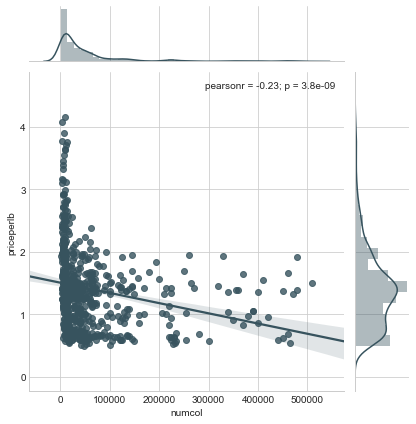

In [57]:
sns.jointplot(x='numcol',y='priceperlb',data=df,kind='reg')


In [37]:
state_mean = df.groupby('state').mean()
state_mean

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
state,,,,,,,
AL,11933.333333,67.533333,8.254667e+05,1.588000e+05,1.418667,1.001933e+06,2005.0
AR,36800.000000,73.933333,2.810400e+06,9.926667e+05,1.092000,2.684400e+06,2005.0
AZ,33666.666667,60.066667,2.032267e+06,8.770000e+05,1.134667,2.111800e+06,2005.0
CA,406666.666667,55.800000,2.316900e+07,6.453800e+06,1.133333,2.435933e+07,2005.0
CO,28000.000000,62.800000,1.750600e+06,8.152667e+05,1.229333,2.090267e+06,2005.0
FL,195200.000000,83.066667,1.646987e+07,2.209600e+06,1.100667,1.661527e+07,2005.0
GA,60400.000000,54.666667,3.299933e+06,3.522667e+05,1.185333,3.867533e+06,2005.0
HI,8733.333333,98.000000,8.431333e+05,1.702000e+05,1.710000,1.404200e+06,2005.0
IA,31466.666667,65.733333,2.080000e+06,1.129933e+06,1.320667,2.588333e+06,2005.0


In [38]:
state_mean.corr()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
numcol,1.000000,0.320971,0.977230,0.914756,-0.432647,0.969971,0.178006
yieldpercol,0.320971,1.000000,0.416157,0.368087,-0.417373,0.415152,0.219523
totalprod,0.977230,0.416157,1.000000,0.926267,-0.426428,0.998070,0.171746
stocks,0.914756,0.368087,0.926267,1.000000,-0.406964,0.932076,0.177058
priceperlb,-0.432647,-0.417373,-0.426428,-0.406964,1.000000,-0.406783,-0.136587
prodvalue,0.969971,0.415152,0.998070,0.932076,-0.406783,1.000000,0.172765
year,0.178006,0.219523,0.171746,0.177058,-0.136587,0.172765,1.000000


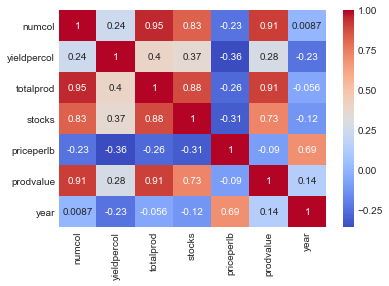

In [47]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

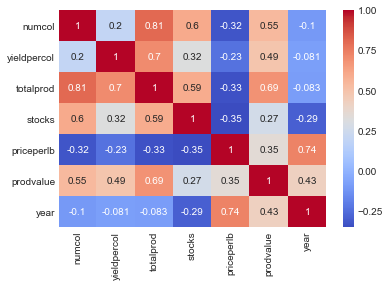

In [62]:
sns.heatmap(decline.corr(),cmap='coolwarm',annot=True)